In [1]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
import helper

from tfomics import utils

Using TensorFlow backend.


In [2]:
results_path = os.path.join('../results', 'synthetic_code_log')
params_path = utils.make_directory(results_path, 'model_params')
params_path = os.path.join(results_path, 'params')
save_path = os.path.join('..', 'scores')

In [3]:

# load data
data_path = '../data/Synthetic_code_dataset.h5'
data = helper.load_dataset(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]
X_model = test_model[true_index][:500]

In [4]:
# save results
file_path = os.path.join(results_path, 'results_log.pickle')
with open(file_path, 'rb') as f:
    scores = cPickle.load(f)
    

In [5]:
scores.keys()

dict_keys(['cnn-deep_log_relu_l2_4', 'cnn-deep_log_relu_4', 'cnn-deep_relu_l2_4', 'cnn-deep_relu_4'])

In [6]:
len(scores['cnn-deep_relu_4'])

5

In [7]:

num_trials = 5
model_names = ['cnn-deep_log_relu_l2_4', 'cnn-deep_log_relu_4', 'cnn-deep_relu_l2_4', 'cnn-deep_relu_4']

results_path = os.path.join('../results', 'synthetic_code_log')
params_path = os.path.join(results_path, 'params')

results = {}
for model_name in model_names:
    shap_roc = []
    shap_pr = []
    for trial in range(num_trials):
        trial_scores = scores[model_name][trial] * X
        roc_score, pr_score = helper.interpretability_performance(X, trial_scores, X_model)
        shap_roc.append(np.mean(roc_score))
        shap_pr.append(np.mean(pr_score))    

    results[model_name] = [np.array(shap_roc), np.array(shap_pr)]
    print('%s: %.4f+/-%.4f\t'%(model_name, 
                               np.mean(results[model_name][0]), 
                               np.std(results[model_name][0]))) 

            

cnn-deep_log_relu_l2_4: 0.7974+/-0.0125	
cnn-deep_log_relu_4: 0.7762+/-0.0177	
cnn-deep_relu_l2_4: 0.7469+/-0.0192	
cnn-deep_relu_4: 0.7411+/-0.0102	


In [8]:

for model_name in model_names:
    print('%s: %.4f+/-%.4f\t'%(model_name, 
                               np.mean(results[model_name][1]), 
                               np.std(results[model_name][1]))) 


cnn-deep_log_relu_l2_4: 0.6956+/-0.0209	
cnn-deep_log_relu_4: 0.6558+/-0.0195	
cnn-deep_relu_l2_4: 0.6554+/-0.0211	
cnn-deep_relu_4: 0.6308+/-0.0197	


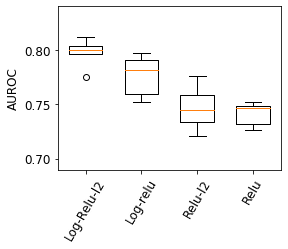

In [9]:


names = ['Log-Relu-l2', 'Log-relu', 'Relu-l2', 'Relu']


fig = plt.figure(figsize=(4,3))
ax = plt.subplot(1,1,1)
vals = [results['cnn-deep_log_relu_l2_4'][0], 
        results['cnn-deep_log_relu_4'][0],
        results['cnn-deep_relu_l2_4'][0], 
        results['cnn-deep_relu_4'][0],
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.7, 0.75, 0.8], fontsize=12)
plt.xticks(np.linspace(1,4,4), names, fontsize=12, rotation=60)
ax.set_ybound([.69,0.84])
ax.set_xbound([.5,4.5])
outfile = os.path.join(results_path, 'task2_compare_attr_score_auroc_log')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

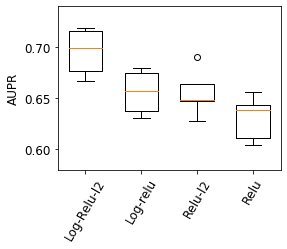

In [11]:


names = ['Log-Relu-l2', 'Log-relu', 'Relu-l2', 'Relu']


fig = plt.figure(figsize=(4,3))
ax = plt.subplot(1,1,1)
vals = [results['cnn-deep_log_relu_l2_4'][1], 
        results['cnn-deep_log_relu_4'][1],
        results['cnn-deep_relu_l2_4'][1], 
        results['cnn-deep_relu_4'][1],
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUPR', fontsize=12)
plt.yticks([ 0.6, 0.65, 0.7], fontsize=12)
plt.xticks(np.linspace(1,4,4), names, fontsize=12, rotation=60)
ax.set_ybound([.58,0.74])
ax.set_xbound([.5,4.5])
outfile = os.path.join(results_path, 'task2_compare_attr_score_pr_log')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

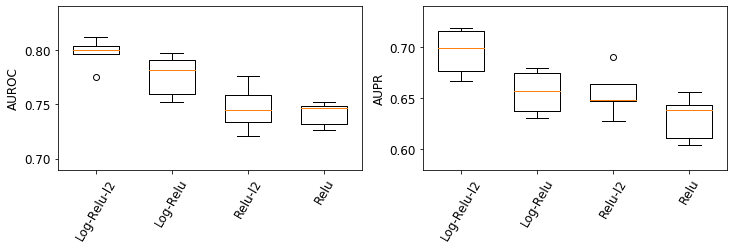

In [41]:


names = ['Log-Relu-l2', 'Log-Relu', 'Relu-l2', 'Relu']


fig = plt.figure(figsize=(12,3))
ax = plt.subplot(121)
vals = [results['cnn-deep_log_relu_l2_4'][0], 
        results['cnn-deep_log_relu_4'][0],
        results['cnn-deep_relu_l2_4'][0], 
        results['cnn-deep_relu_4'][0],
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.7, 0.75, 0.8], fontsize=12)
plt.xticks(np.linspace(1,4,4), names, fontsize=12, rotation=60)
ax.set_ybound([.69,0.84])
ax.set_xbound([.5,4.5])


ax = plt.subplot(122)
vals = [results['cnn-deep_log_relu_l2_4'][1], 
        results['cnn-deep_log_relu_4'][1],
        results['cnn-deep_relu_l2_4'][1], 
        results['cnn-deep_relu_4'][1],
       ]
ax.boxplot(vals,  widths = 0.6);
plt.ylabel('AUPR', fontsize=12)
plt.yticks([ 0.6, 0.65, 0.7], fontsize=12)
plt.xticks(np.linspace(1,4,4), names, fontsize=12, rotation=60)
ax.set_ybound([.58,0.74])
ax.set_xbound([.5,4.5])
outfile = os.path.join(results_path, 'task2_compare_attr_score_log')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

